In [65]:
import os, glob
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns=None
pd.options.display.max_rows=None
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")

In [73]:
ibisdir = Path(os.environ['DATA'], 'Ben', 'IBIS', 'Fe7090')
calfiles = list(ibisdir.rglob('calibration_rs*_*/param_sweep_*.csv'))
vunit = 70000/12
calfiles

[PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs8_sigmaf0.5_fourier20.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs8_sigmaf0.5_fourier12.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs10_sigmaf1.0_fourier14.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs8_sigmaf0.5_fourier16.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs10_sigmaf0.5_fourier14.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs10_sigmaf0.5_fourier12.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs10_sigmaf1.0_fourier18.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs8_sigmaf1.0_fourier20.0/param_sweep_boxcar_fwhm37.csv'),
 PosixPath('/mnt/data2/Ben/IBIS/Fe7090/calibration_rs8_sigmaf1.0_fourier12.0/param_sweep_boxcar_fwhm37.csv'),
 Posix

In [60]:
# Concatenate all csv file content into one dataframe
df_list = [pd.read_csv(f) for f in calfiles]
df0 = df_list[0]
display(df0.drop(columns=['index']))
vtop8 = df0.iloc[:,14:25]
display(vtop8)

,rs,intsteps,ballspacing,dp,sigma_factor,fourier_radius,nframes,kernel,fwhm,p_top_0,p_top_1,p_bot_0,p_bot_1,vx_top -0.50,vx_top -0.40,vx_top -0.30,vx_top -0.20,vx_top -0.10,vx_top 0.00,vx_top 0.10,vx_top 0.20,vx_top 0.30,vx_top 0.40,vx_top 0.50,vx_bottom -0.50,vx_bottom -0.40,vx_bottom -0.30,vx_bottom -0.20,vx_bottom -0.10,vx_bottom 0.00,vx_bottom 0.10,vx_bottom 0.20,vx_bottom 0.30,vx_bottom 0.40,vx_bottom 0.50
0,8,5,8,0.25,0.5,20.0,300,boxcar,37,2.046003,0.001057,2.065917,0.000501,-0.24659,-0.197462,-0.148132,-0.098703,-0.048249,0.001358,0.052782,0.099061,0.147909,0.194327,0.238015,-0.242599,-0.195188,-0.146765,-0.096919,-0.048466,0.001669,0.050359,0.097681,0.146454,0.193069,0.238039


,vx_top -0.50,vx_top -0.40,vx_top -0.30,vx_top -0.20,vx_top -0.10,vx_top 0.00,vx_top 0.10,vx_top 0.20,vx_top 0.30,vx_top 0.40,vx_top 0.50
0,-0.24659,-0.197462,-0.148132,-0.098703,-0.048249,0.001358,0.052782,0.099061,0.147909,0.194327,0.238015


In [79]:
vdrift = np.arange(-0.5, 0.51, 0.1)
df_list2 = []
for idx, df in enumerate(df_list):
    vtop = df.iloc[:, 14:25]
    vbot = df.iloc[:, 14:25]
    df2 = df.iloc[:,0:14].drop(columns=['index', 'fwhm']).loc[df.index.repeat(11)]
    df2['idx'] = idx
    df2['vx_drift'] = vdrift
    df2['vx_top'] = vtop.iloc[0,:].values
    df2['vx_top_cal'] = vtop.iloc[0,:].values*df['p_top_0'].values[0] + df['p_top_1'].values[0]
    df2['vx_bot_cal'] = vbot.iloc[0,:].values*df['p_bot_0'].values[0] + df['p_bot_1'].values[0]
    df2['vx_cal'] = 0.5*(df2['vx_top_cal'] + df2['vx_bot_cal'])
    df2['mae_top'] =  (df2['vx_top_cal'] - df2['vx_drift']).abs().mean()*vunit
    df2['mae_bot'] =  (df2['vx_bot_cal'] - df2['vx_drift']).abs().mean()*vunit
    df2['mae'] =  (df2['vx_cal'] - df2['vx_drift']).abs().mean()*vunit
    df_list2.append(df2)

df = pd.concat(df_list2, axis=0, ignore_index=True)
display(df0.drop(columns=['index']))
display(df.head())
df.drop_duplicates('idx').drop(columns=['kernel', 'ballspacing', 'intsteps', 'dp', 'vx_top', 'vx_cal', 'vx_drift']).sort_values(by=['fourier_radius', 'sigma_factor'])

,rs,intsteps,ballspacing,dp,sigma_factor,fourier_radius,nframes,kernel,fwhm,p_top_0,p_top_1,p_bot_0,p_bot_1,vx_top -0.50,vx_top -0.40,vx_top -0.30,vx_top -0.20,vx_top -0.10,vx_top 0.00,vx_top 0.10,vx_top 0.20,vx_top 0.30,vx_top 0.40,vx_top 0.50,vx_bottom -0.50,vx_bottom -0.40,vx_bottom -0.30,vx_bottom -0.20,vx_bottom -0.10,vx_bottom 0.00,vx_bottom 0.10,vx_bottom 0.20,vx_bottom 0.30,vx_bottom 0.40,vx_bottom 0.50
0,8,5,8,0.25,0.5,20.0,300,boxcar,37,2.046003,0.001057,2.065917,0.000501,-0.24659,-0.197462,-0.148132,-0.098703,-0.048249,0.001358,0.052782,0.099061,0.147909,0.194327,0.238015,-0.242599,-0.195188,-0.146765,-0.096919,-0.048466,0.001669,0.050359,0.097681,0.146454,0.193069,0.238039


,rs,intsteps,ballspacing,dp,sigma_factor,fourier_radius,nframes,kernel,p_top_0,p_top_1,p_bot_0,p_bot_1,idx,vx_drift,vx_top,vx_top_cal,vx_bot_cal,vx_cal,mae_top,mae_bot,mae
0,8,5,8,0.25,0.5,20.0,300,boxcar,2.046003,0.001057,2.065917,0.000501,0,-0.5,-0.246590,-0.503468,-0.508935,-0.506201,24.01369,31.793083,27.188151
1,8,5,8,0.25,0.5,20.0,300,boxcar,2.046003,0.001057,2.065917,0.000501,0,-0.4,-0.197462,-0.402950,-0.407438,-0.405194,24.01369,31.793083,27.188151
2,8,5,8,0.25,0.5,20.0,300,boxcar,2.046003,0.001057,2.065917,0.000501,0,-0.3,-0.148132,-0.302022,-0.305528,-0.303775,24.01369,31.793083,27.188151
3,8,5,8,0.25,0.5,20.0,300,boxcar,2.046003,0.001057,2.065917,0.000501,0,-0.2,-0.098703,-0.200890,-0.203411,-0.202151,24.01369,31.793083,27.188151
4,8,5,8,0.25,0.5,20.0,300,boxcar,2.046003,0.001057,2.065917,0.000501,0,-0.1,-0.048249,-0.097660,-0.099177,-0.098419,24.01369,31.793083,27.188151


,rs,sigma_factor,fourier_radius,nframes,p_top_0,p_top_1,p_bot_0,p_bot_1,idx,vx_top_cal,vx_bot_cal,mae_top,mae_bot,mae
231,8,1.0,5.0,300,4.572554,0.004632,4.438380,4.271455e-03,21,-0.482908,-0.468963,88.378326,88.222131,85.585267
286,8,1.5,5.0,300,5.913322,0.004338,5.690720,3.518766e-03,26,-0.472796,-0.455655,125.567895,126.748303,123.185036
275,8,2.0,5.0,300,7.493733,0.004573,7.171297,3.585529e-03,25,-0.458811,-0.439860,162.874757,163.749876,160.497206
99,10,0.5,10.0,300,2.360647,0.004953,2.472729,9.571428e-04,9,-0.501798,-0.529854,28.663525,84.701958,51.772352
165,8,0.5,10.0,300,2.396168,0.002789,2.404041,6.746627e-04,15,-0.503096,-0.506873,27.870061,30.280357,28.311253
121,8,1.0,10.0,300,2.960500,0.001777,2.933561,2.771406e-03,11,-0.496400,-0.490872,42.695757,42.843170,42.769463
187,10,1.0,10.0,300,2.924043,0.003212,2.956811,3.729105e-03,17,-0.493752,-0.498803,54.935660,61.603060,58.196968
297,8,1.5,10.0,300,3.574674,0.003546,3.505626,3.217226e-03,27,-0.490986,-0.481762,61.623025,58.521862,60.072443
209,8,2.0,10.0,300,4.261935,0.003636,4.166161,2.291446e-03,19,-0.483512,-0.473910,87.709524,84.457505,85.867283
11,8,0.5,12.0,300,2.239222,0.001630,2.248210,-7.511094e-07,1,-0.503351,-0.507009,24.067973,27.161350,25.614662


In [75]:
df.iloc[[df.p_top_0.argmin(), df.mae.argmin()], :]

,rs,intsteps,ballspacing,dp,sigma_factor,fourier_radius,nframes,kernel,p_top_0,p_top_1,p_bot_0,p_bot_1,idx,vx_drift,vx_top,vx_cal,mae
308,10,5,10,0.25,0.5,20.0,300,boxcar,1.952662,0.004060,2.009031,0.000116,28,-0.5,-0.259737,-0.512411,34.846882
33,8,5,8,0.25,0.5,16.0,300,boxcar,2.089272,0.000625,2.099058,-0.000127,3,-0.5,-0.241419,-0.505322,19.141548


Text(0.5, 1.0, '$R_s$ = 8 px - Fourier filtering @ 1/(10 px)')

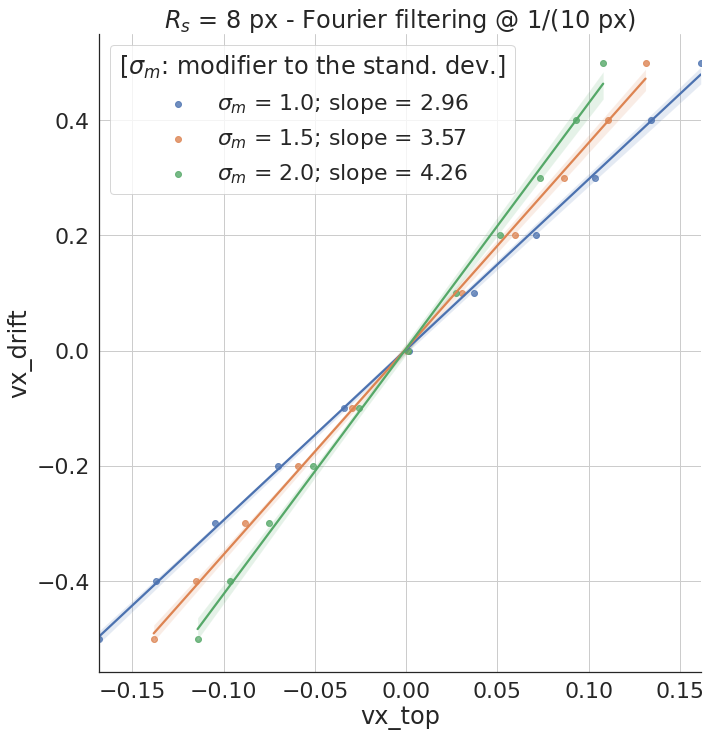

In [55]:
lm = sns.lmplot(data=df[df['fourier_radius']==10.0], x='vx_top', y='vx_drift', hue='sigma_factor', height=10, legend_out=False)
lm.axes[0,0].grid()
leg = lm.axes.flat[0].get_legend()
leg.set_title(r'[$\sigma_m$: modifier to the stand. dev.]')
tempdf = df[df['fourier_radius']==10.0].drop_duplicates('p_top_0').sort_values(by=['sigma_factor'])
new_labels = [fr'$\sigma_m$ = {row["sigma_factor"]}; slope = {row["p_top_0"]:.2f}' for _, row in tempdf.iterrows()]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.title(r'$R_s$ = 8 px - Fourier filtering @ 1/(10 px)')

In [12]:
for index, row in tempdf.iterrows():
    print(row['sigma_factor'])

1.0
1.5
2.0


,rs,intsteps,ballspacing,dp,sigma_factor,fourier_radius,nframes,kernel,p_top_0,p_top_1,p_bot_0,p_bot_1,vx_drift,vx_top
0,8,5,8,0.25,1.0,10.0,300,boxcar,2.960500,0.001777,2.933561,0.002771,-0.5,-0.168275
22,8,5,8,0.25,1.0,5.0,300,boxcar,4.572554,0.004632,4.438380,0.004271,-0.5,-0.106623
44,8,5,8,0.25,1.5,5.0,300,boxcar,5.913322,0.004338,5.690720,0.003519,-0.5,-0.080688
55,8,5,8,0.25,1.5,10.0,300,boxcar,3.574674,0.003546,3.505626,0.003217,-0.5,-0.138343
11,8,5,8,0.25,2.0,10.0,300,boxcar,4.261935,0.003636,4.166161,0.002291,-0.5,-0.114302
33,8,5,8,0.25,2.0,5.0,300,boxcar,7.493733,0.004573,7.171297,0.003586,-0.5,-0.061836
